<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/NN_classification_LargeEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
#Bu datada test ve training setler zaten ayrılmış o yüzden sadece uptade edicez.

(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

In [ ]:
#Show the training datas
print(f"Training sample :\n {train_data[0]}\n " )
print(f"Training label :\n {train_labels[0]}\n " )


Training sample :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
#Check the shape of single example. (yukarda training label 9 çıktı sadece eğer dataya tensorflowun sitesinden bakarsak 9 un ankle boot u gösterdiğini görebiliriz.)

train_data[0].shape , train_labels[0].shape

((28, 28), ())

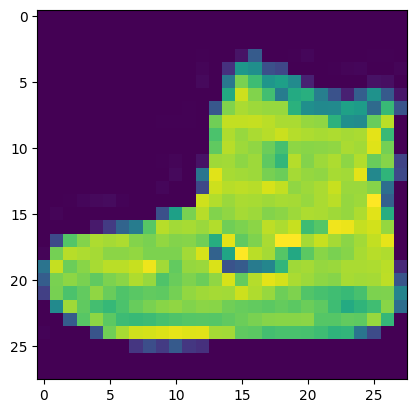

In [ ]:
#Plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[0]);  #imshow image visualize etmek için kullanılıyor matplot da


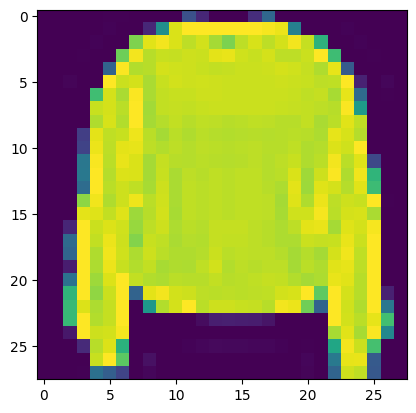

In [ ]:
plt.imshow(train_data[7]);

In [ ]:
train_labels[7] #yukarda bastırdık biz train datadaki 7. elementi ve bu pullover yani kazak gibi gözüküyor gördüğümüz gibi. bunun label daki değeri 2 çıktı şu an yazdığımız kodla. Siteden bakarsak 2 zaten pullover olarak gözüküyor.

2

In [ ]:
#Create a small list so we can index onto our training labels so they are human-readable. (yani biz az önce gördüğümüz gibi label lar 0 1 2 gibi numaralarla geliyor bu neural network için iyi fakat biz direkt ismini öğrenmek istiyoruz bu yüzden liste oluşturucaz.)
class_names = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , 	"Ankle boot"]





Text(0.5, 1.0, 'Dress')

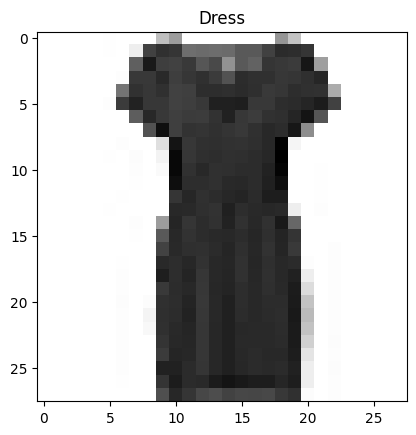

In [ ]:
#Plot an example image and its labels
index_of_choice = 20  #bunu bilerek farklı bir variable olarak atıyoruz istediğimiz zaman sayıyı değiştirip görebilelim diye
plt.imshow(train_data[index_of_choice] , cmap = plt.cm.binary)  #plt.cm.binary dememizin sebebi image lar grayscale de oldugu icin binary kullanılıyor.
plt.title(class_names[train_labels[index_of_choice]])

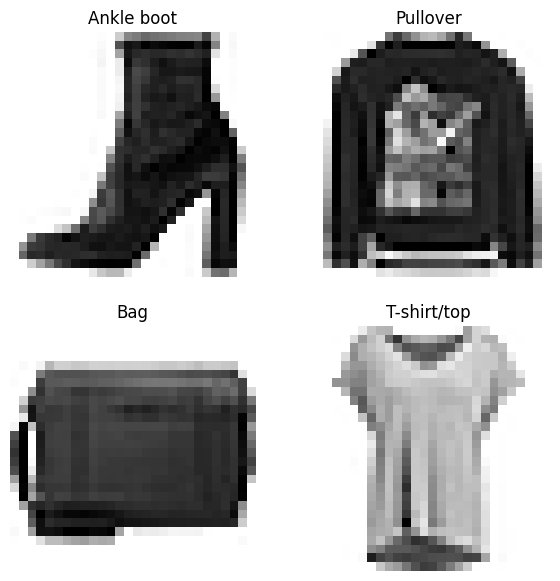

In [ ]:
#Plot multiple random images of fashion mnits

import random
plt.figure(figsize = (7,7)) #Yeni bir 7x7 boyutunda bir çizim alanı oluşturuyoruz. Tüm alt çizimler (subplotlar) bu ana çizim alanında görüntülenecektir.

for i in range(4):
  ax = plt.subplot(2 , 2 , i+1)  #2x2'lik bir alt çizim düzeni oluşturuyoruz ve bu düzen içindeki i'inci konumu seçiyoruz. i, 0'dan 3'e kadar olan değerler alacağı için alt çizimler şu konumlarda olacak: 1, 2, 3 ve 4. sadece i desek error veriyor 1 den başlamalı bu subplot sırası
  rand_index = random.choice(range(len(train_data)))  #train_data listesinin uzunluğu kadar rastgele bir indeks seçiyoruz. Bu indeks, eğitim veri kümesinden rastgele bir örneği temsil eder.
  plt.imshow(train_data[rand_index] , cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multiclass classification model
We should tweak something.
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10
* Loss function = tf.keras.losses.CategoricalCrossentropy --
if your labels are in one hot encoded form , use CategoricalCrossentropy() ,
if your labels are in integer form , use SparseCategoricalCrossentropy()
* Output layer activation = softmax not sigmoid
* Eğer shape error alıyorsan bakman gereken 3 şey var
* 1) Input shape : flatten yapman gerekebilir
* 2) output shape : outputunda kaç class varsa o kadar neuron eklemen gerek.
* 3) loss function : one hot encoded olup olmama durumu yukardaki.

In [ ]:
train_data[0].shape #for learning input shape

(28, 28)

In [ ]:
len(class_names)  #multiclass classification da output shape belirlerken her class için 1 neuron ekleyeceğimiz için classlarımız için oluşturduğumuz listenin uzunluğunu alıyoruz

10

In [ ]:
flatten_model = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape = (28 , 28))]
)
flatten_model.output_shape
#burda flatten yani düzleştirmek dediğimiz şeyi yapıyoruz. Bizim neural networkumuz 1 tane uzun vektörle çalışıyor. Bu yüzden 28x28 shape i olan inputumuzu tek bir uzun vektöre çeviriyor flatten
#Gördüğümüz gibi 28x28 yerine none,784 yaptı yani 28 x 28 = 784 oldugu icin

(None, 784)

In [ ]:
# Create a model
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten( input_shape = (28 , 28))   ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)  #binary classification olsa 1 kullanacaktık output layerın neuron sayısını fakat multiclass olunca outputta kaç class varsa o kadar neuron koymamız gerekiyor. Bizde 10 farklı class oldugu icin 10 kullanıyoruz.
    ]
)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,  #burda inputumuzu flatten yaptıgımız hale shape error alıyoruz. Bunun sebebi direkt categorical cross entropy kullanmamız. Categorical cross entropy input olarak one hot encoding uygulanmış şeyler alıyor. Biz uygulamadıgımız icin shape error alıyoruz. Bunu one hot encoding yapmadan düzeltmenin yolu da sparse kullanmak
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ["accuracy"]

              )

hist_non_norm = model.fit(train_data , train_labels ,  epochs = 10 , validation_data = (test_data , test_labels) ) #validation data unseen bir şey bu fit modelinde ve biz modelimizin unseen datada ne kadar iyi öğrendiğini gözlemlicez

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3219 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
 # Create a model with one hot encoded labels
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten( input_shape = (28 , 28))   ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)  #binary classification olsa 1 kullanacaktık output layerın neuron sayısını fakat multiclass olunca outputta kaç class varsa o kadar neuron koymamız gerekiyor. Bizde 10 farklı class oldugu icin 10 kullanıyoruz.
    ]
)

model.compile(loss = tf.keras.losses.CategoricalCrossentropy() ,  #burda inputumuzu flatten yaptıgımız hale shape error alıyoruz. Bunun sebebi direkt categorical cross entropy kullanmamız. Categorical cross entropy input olarak one hot encoding uygulanmış şeyler alıyor. Biz uygulamadıgımız icin shape error alıyoruz. Bunu one hot encoding yapmadan düzeltmenin yolu da sparse kullanmak
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ["accuracy"]

              )

model.fit(train_data , tf.one_hot(train_labels , depth = 10) ,  epochs = 10 , validation_data = (test_data , tf.one_hot(test_labels , depth = 10)) )

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3289 - accuracy: 0.0968 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check the min and max values of the training data
train_data.min() , train_data.max()

(0, 255)

# Neural networks prefer data to be scaled (or normalized). This means they like to have numbers in the tensors they try to find patterns between 0 and 1

In [ ]:
#We can get our training and test data between 0 and 1 by dividing all of the elements into our datas by dividing the max. Our max value is 255 as we can see above
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized. lets build a model to find the patterns in it

tf.random.set_seed(42)

model_norm = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28)) ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(4 , activation =  "relu") ,
     tf.keras.layers.Dense(10 , activation = "softmax")



    ]
)

model_norm.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
                   optimizer = tf.keras.optimizers.Adam() ,
                   metrics = ["accuracy"]

                   )

hist_norm = model_norm.fit(train_data_norm , train_labels , epochs = 10 , validation_data = (test_data_norm , test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1052 - accuracy: 0.6289 - val_loss: 0.6978 - val_accuracy: 0.7762
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6255 - accuracy: 0.7940 - val_loss: 0.6177 - val_accuracy: 0.7932
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5755 - accuracy: 0.8053 - val_loss: 0.5953 - val_accuracy: 0.7946
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5522 - accuracy: 0.8115 - val_loss: 0.5817 - val_accuracy: 0.7972
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5406 - accuracy: 0.8145 - val_loss: 0.5898 - val_accuracy: 0.7959
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5300 - accuracy: 0.8174 - val_loss: 0.5680 - val_accuracy: 0.8018
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5255 - accuracy: 0.8181 - val_loss: 0.5676 - val_accuracy:

# As we can see , neural networks tends to prefer data in numerical form as well as scaled/normalized(numbers between 0 and 1) accuracynin sadece normalize ettiğimizde ne kadar yükseldiğini görebiliriz.

Text(0.5, 1.0, 'Normalized Loss curve')

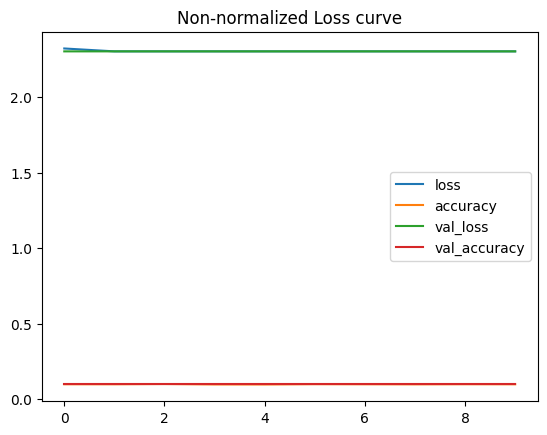

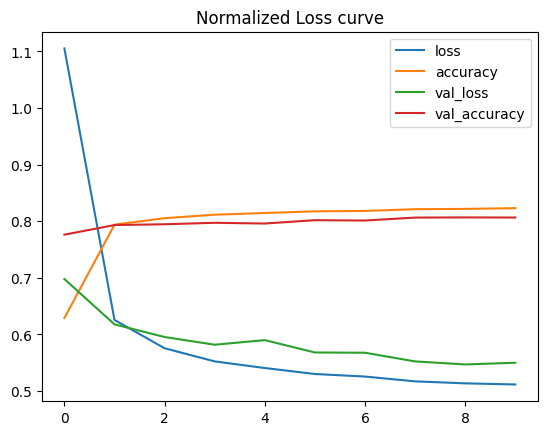

In [ ]:
#Loss curve for non normalized
import pandas as pd
pd.DataFrame(hist_non_norm.history).plot()
plt.title("Non-normalized Loss curve")

#Loss curve for normalized data
pd.DataFrame(hist_norm.history).plot()
plt.title("Normalized Loss curve")

# The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

In [ ]:
# Now our data is normalized. lets build a model to find the patterns in it

tf.random.set_seed(42)

model_norm_lr = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28)) ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(4 , activation =  "relu") ,
     tf.keras.layers.Dense(10 , activation = "softmax")



    ]
)

model_norm_lr.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
                   optimizer = tf.keras.optimizers.Adam() ,
                   metrics = ["accuracy"]

                   )
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

hist_norm_lr = model_norm_lr.fit(train_data_norm , train_labels , epochs = 40 , validation_data = (test_data_norm , test_labels) , callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3130 - accuracy: 0.4671 - val_loss: 1.0957 - val_accuracy: 0.5338 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9643 - accuracy: 0.6345 - val_loss: 0.8945 - val_accuracy: 0.6792 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7964 - accuracy: 0.7213 - val_loss: 0.7464 - val_accuracy: 0.7412 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7023 - accuracy: 0.7524 - val_loss: 0.6954 - val_accuracy: 0.7534 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6663 - accuracy: 0.7624 - val_loss: 0.6744 - val_accuracy: 0.7602 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6396 - accuracy: 0.7709 - val_loss: 0.6726 - val_accuracy: 0.7572 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

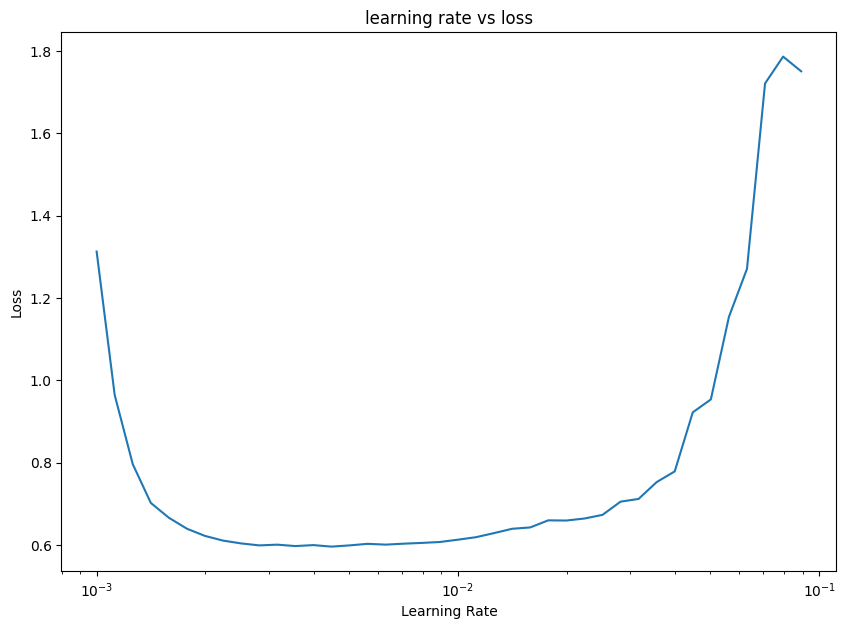

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10 ** (tf.range(40)/20))  #lambda epoch : 1e-3 * 10**(epoch/20)  model oluşturduğumuz koddaki şeyin aynısını yaptık
plt.figure(figsize = (10,7))
plt.semilogx( lrs , hist_norm_lr.history["loss"])  #semilogx dediğimiz x eksenini logaritmik çizdiriyor. History fonksiyonunda da sadece loss kısmını alıyoruz.
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("learning rate vs loss");  #bu grafikte düşüşün düzgünlüğü gittikten sonraki yerlerde bi yerde best learning rate oluyor.

#It seems to be our default adam learning rate value is the best option.

In [ ]:
tf.random.set_seed(42)

model_norm_end = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28)) ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(4 , activation =  "relu") ,
     tf.keras.layers.Dense(10 , activation = "softmax")



    ]
)

model_norm_end.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
                   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
                   metrics = ["accuracy"]

                   )

hist_norm_end = model_norm_end.fit(train_data_norm , train_labels , epochs = 20 , validation_data = (test_data_norm , test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3007 - accuracy: 0.5514 - val_loss: 0.9068 - val_accuracy: 0.7213
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7601 - accuracy: 0.7512 - val_loss: 0.7412 - val_accuracy: 0.7497
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6694 - accuracy: 0.7668 - val_loss: 0.6745 - val_accuracy: 0.7683
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6384 - accuracy: 0.7725 - val_loss: 0.6543 - val_accuracy: 0.7719
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6193 - accuracy: 0.7771 - val_loss: 0.6553 - val_accuracy: 0.7668
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6031 - accuracy: 0.7827 - val_loss: 0.6324 - val_accuracy: 0.7765
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5867 - accuracy: 0.7901 - val_loss: 0.6350 - val_accuracy:

# Evaluating our multiclass classification model
To evaluate our multiclass classification model we could:
* Evaluate its performance using another classification metrics such as a confusion metrics
* Assess some of its predictions (through visualization)
* Improve its results (by training for longer or changing the architecture)
* Save and export it for using in an another application

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

# Remember to make predictions on the same kind of data your model was trained. Yani eğer modelini normalized value lar ile train ettiysen predict ederken de normalize value lar üzerinden predict ediceksin.

In [ ]:
#Lets make predictions
y_probs = model_norm_end.predict(test_data_norm)
y_probs[0] , class_names[ tf.argmax(y_probs[0])]

313/313 [==============================] - 0s 966us/step


(array([1.5733417e-04, 9.2366575e-10, 5.4743737e-07, 4.3224431e-06,
        3.8926883e-13, 1.9840159e-01, 8.4255034e-06, 1.9006144e-01,
        2.0894794e-02, 5.9047151e-01], dtype=float32),
 'Ankle boot')

In [ ]:
# Convert all the predictions into integer form
y_preds = y_probs.argmax(axis = 1)
y_preds[ : 10]
#Now our y_preds and test_labels in the same format

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_labels, y_preds)  #confusion matrix yaparken scaled valueları kullanmıyoruz çünkü bize human-readable outputlar lazım zaten bu yüzden argmax ile probabilities leri de normal integer değerlere çevirdik.
print(cm)
accuracy_score(test_labels, y_preds)

[[707   0   5  92  14   0 171   0  11   0]
 [  1 947   8  31   9   0   4   0   0   0]
 [ 14   0 623  11 211   3 136   0   2   0]
 [ 32  20   1 819  48   3  70   1   6   0]
 [  0   6  66  29 827   0  69   0   3   0]
 [  2   0   0   1   0 909   1  48  13  26]
 [137   2  96  49 197   1 507   0  11   0]
 [  0   0   0   0   0  32   0 926   2  40]
 [  9   0   0   7  13   7  20   4 940   0]
 [  2   0   0   1   0  22   0  56   6 913]]


0.8118

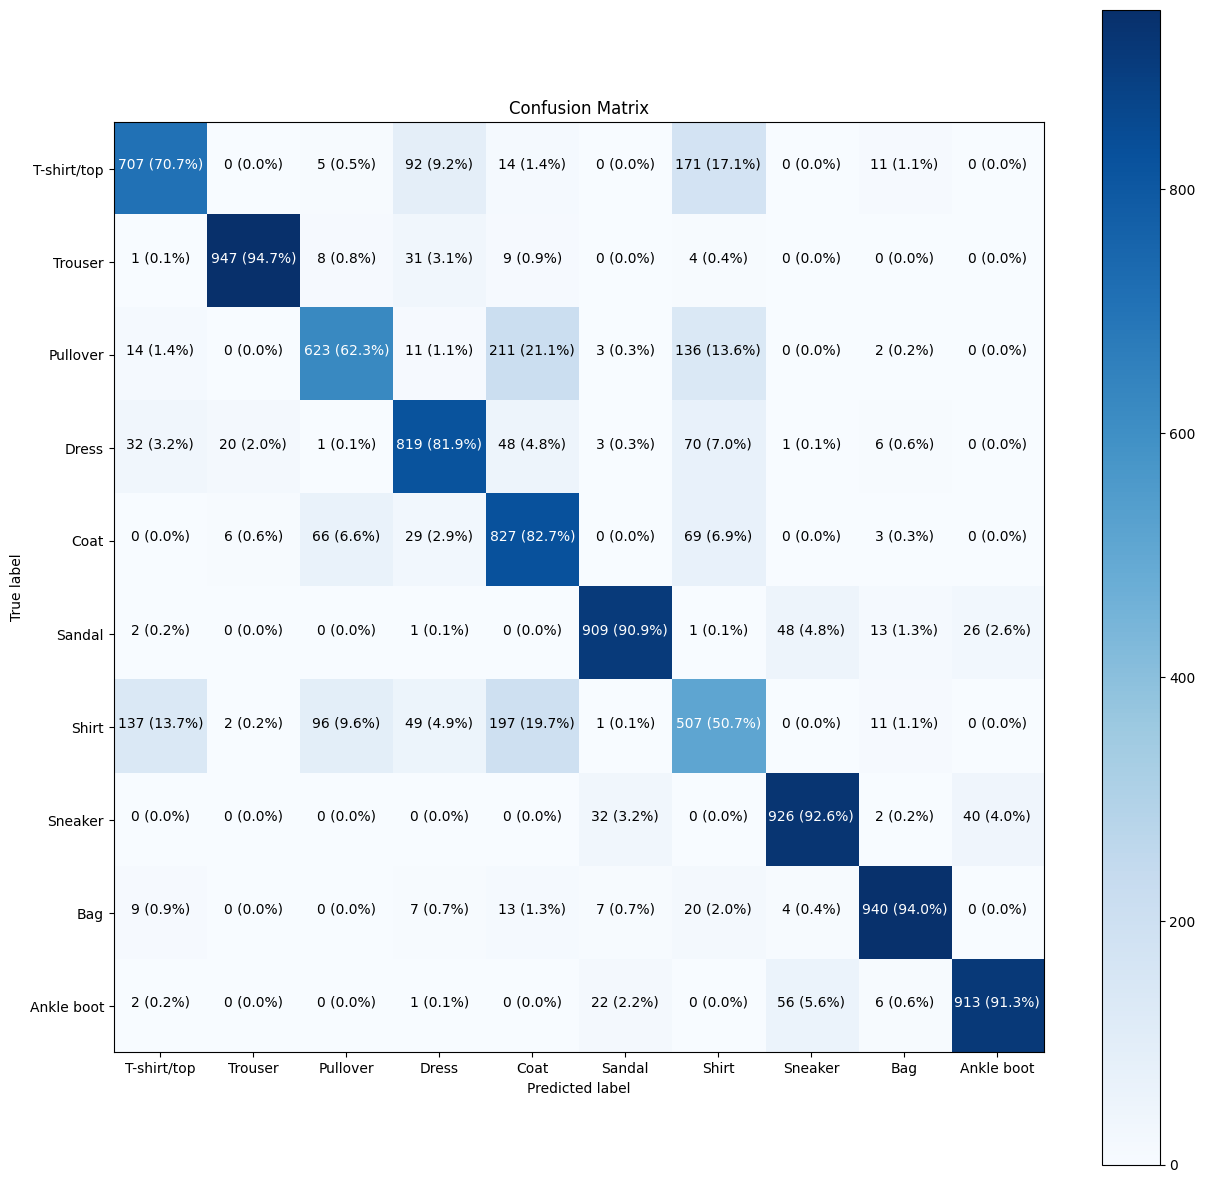

In [ ]:
# Make a prettier confusion matrix
import numpy as np
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15) ,
                      text_size = 10
                      )

#Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [ ]:
import random
def plot_random_image(model , images , true_labels, classes):
  """
  Picks a random image , plot it and labels it with a prediction and truth label
  """
  #Set up random integer
  i = random.randint( 0 , len(images))
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image , cmap = plt.cm.binary)

  #Change the color of the titles depending on if the predictions is right or wrong
  if true_label == pred_label :
    color = "green"
  else:
    color = "red"
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 [==============================] - 0s 15ms/step


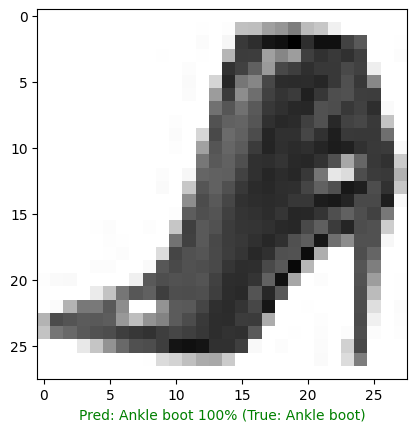

In [ ]:
plot_random_image(model = model_norm_end , images = test_data_norm , true_labels = test_labels , classes = class_names )

# What patterns is our model learning?

In [ ]:
#Find the layers of our most recent model
model_norm_end.layers


In [ ]:
# Extract(çekmek) a particular layer
model_norm_end.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights , biases = model_norm_end.layers[1].get_weights()

#Shapes
weights , weights.shape  #shape sonucundaki 784 bizim image larımızın 28x28 olmasından kaynaklı

(array([[ 0.43655536, -0.77276474,  0.2531607 ,  0.26641184],
        [ 0.8181873 , -0.24317713,  0.51339304, -0.4735634 ],
        [ 0.99136   , -1.1534072 , -0.31160468, -0.3173984 ],
        ...,
        [ 0.10978615, -0.13353409,  0.36095586,  0.4795476 ],
        [-0.39346352,  0.19208618,  0.06667595,  0.30661955],
        [-0.04642291, -0.3441464 , -0.47879705,  0.18085428]],
       dtype=float32),
 (784, 4))

In [ ]:
model_norm_end.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lets check out the bias vector
biases , biases.shape
#Weights ile bias farkı weights her input için farklı değerler alırken bias her neuron için farklı değer alıyor. Bu yüzden weights te 784 görürken bias da sadece 4 görüyoruz çünkü 4 neuron var layerda

(array([1.6826336, 2.2393055, 2.1025267, 1.5817878], dtype=float32), (4,))

# Every neuron has a bias vector. Each of these is paired with a weight matrix.

# The bias values get initialized as zeroes by default (using the bias_initializer parameter).

# The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

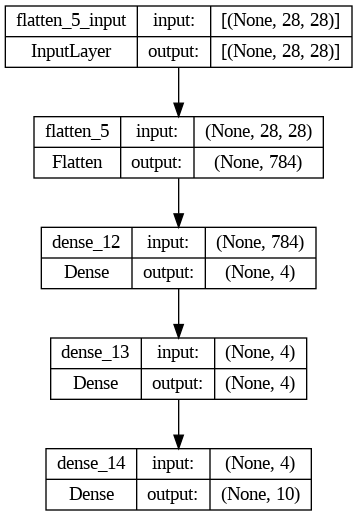

In [ ]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
#See the inputs and outputs of each layer
plot_model(model_norm_end , show_shapes = True)